In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
import os
sys.path.append('../python/')

#set up matplotlib
os.environ['MPLCONFIGDIR'] = '../mplstyles'
print(os.environ['MPLCONFIGDIR'])
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')
print(mpl.__version__) 
print(mpl.get_configdir())


#fonts
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'32'}
legend_font = {'fontname':'Arial', 'size':'22'}

#fonts global settings
mpl.rc('font',family=legend_font['fontname'])


#set up numpy
import numpy as np

../mplstyles
3.0.3
/home/phys/villaa/analysis/misc/nrFano_Constraint/mplstyles


# Summary

In the notebook `stat_uncertainty_C.ipynb` we extracted the fit uncertainties for both the EDELWEISS measured ionization yield widths and the widths that result from _only_ the inclusion of multiple-scatter events in the nuclear recoil band. 

Since the EDELWEISS measured widths are still significantly larger than those for the multiple-scatter event inclusion, it implies that there is another factor that serves to widen the ionization yield distribution at a given measured recoil energy. We assume that factor is the effective nuclear recoil Fano factor. 

In [2]:
import fano_calc as fc

(Er,F,Fup,Fdn) = fc.RWCalcFMCMC('data/mcmc_fano.h5')

GGA3/4.0/5.556E-02/0.0381/
True


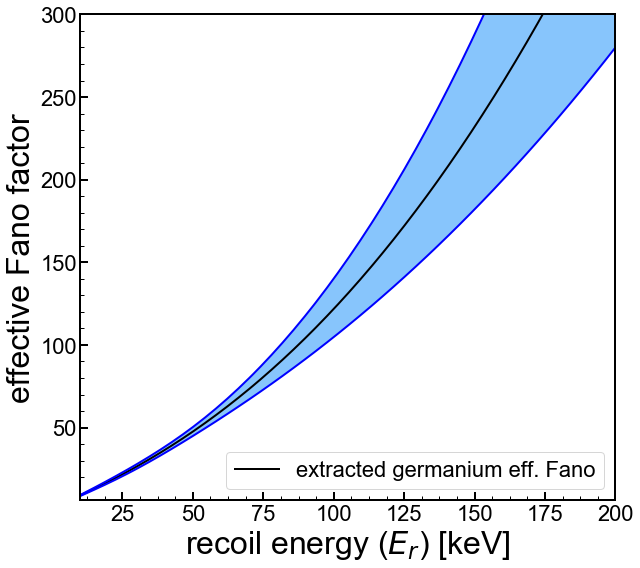

In [10]:
#set up a plot

fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

xmax=10

#ax1.errorbar(ddata_e,ddata_fluct_F,yerr=[ddata_fluct_F_err,ddata_fluct_F_err], marker='o', markersize=8, \
#             ecolor='k',color='k', linestyle='none', label='Dougherty eff. F', linewidth=2)


#ax1.plot (X, diff, 'm-', label='Thomas-Fermi (newgrad)')
#ax1.plot (Esi(epr), 100*np.sqrt(f_Omega2_eta2(epr))*ylindv(1000*Esi(epr)), 'g-', label='$\Omega/\epsilon$ (NAC III approx. D)')
ax1.plot (Er, F, 'k-', label='extracted germanium eff. Fano')
ax1.plot (Er, Fup, 'b', label='')
ax1.plot (Er, Fdn, 'b', label='')


blue = '#118DFA'
ax1.fill_between(Er,Fdn,Fup,facecolor=blue,alpha=0.5)


ax1.set_yscale('linear')
ax1.set_xscale('linear')
ax1.set_xlim(10, 200)
ax1.set_ylim(6,300)
ax1.set_xlabel('recoil energy ($E_r$) [keV]',**axis_font)
ax1.set_ylabel('effective Fano factor',**axis_font)
#ax1.grid(True)
#ax1.xaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=4,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()